# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [17]:
df = pd.read_csv("air_traffic_clustered.csv")
df.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month,Cluster
0,-1.713878,0,60,0,54,0,8,0,0,2,1,-0.035526,0,-0.037120,-1.712994,5,1
1,-1.713878,0,60,0,54,0,8,1,0,2,1,-0.003675,1,-0.005249,-1.712994,5,1
2,-1.713878,0,60,0,54,0,8,2,0,2,1,-0.409795,2,-0.318832,-1.712994,5,1
3,-1.713878,4,6,4,6,1,2,0,1,2,1,0.099499,0,0.097988,-1.712994,5,0
4,-1.713878,4,6,4,6,1,2,1,1,2,1,0.081244,1,0.079722,-1.712994,5,0


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [18]:
X = df.drop(columns=["Cluster"])
y = df["Cluster"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Ukuran Data Training: ", X_train.shape)
print("Ukuran Data Testing : ", X_test.shape)

Ukuran Data Training:  (11962, 16)
Ukuran Data Testing :  (2991, 16)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [19]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

K-Nearest Neighbors (KNN) adalah algoritma supervised learning yang digunakan untuk mengklasifikasikan data baru berdasarkan kedekatannya dengan data yang sudah diberi label dalam dataset pelatihan.

In [40]:
svm = SVC()
svm.fit(X_train, y_train)

SVC()

Support Vector Machine (SVM) adalah algoritma pembelajaran mesin yang digunakan untuk klasifikasi dan regresi dengan mencari hyperplane optimal yang memisahkan kelas-kelas dalam ruang fitur. SVM bekerja dengan memaksimalkan margin antara kelas menggunakan titik-titik data terdekat yang disebut support vectors.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [36]:
y_pred_knn = knn.predict(X_test)
print(f"Confusion Matrix:\n {confusion_matrix(y_test, y_pred_knn)}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn)}")
print(f"Precision: {precision_score(y_test, y_pred_knn, average='macro')}")
print(f"Recall: {recall_score(y_test, y_pred_knn, average='macro')}")
print(f"F1-Score: {f1_score(y_test, y_pred_knn, average='macro')}")

Confusion Matrix:
 [[1114    1    1]
 [   1 1118    0]
 [   2    0  754]]
Accuracy: 0.9983283182881979
Precision: 0.9983653587321465
Recall: 0.9982229092033353
F1-Score: 0.9982939215582612


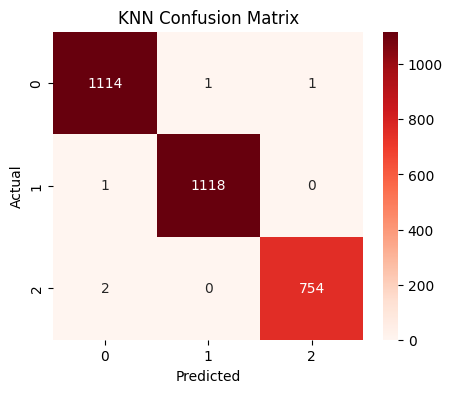

In [53]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Reds')
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [41]:
y_pred_svm = svm.predict(X_test)
print(f"Confusion Matrix:\n {confusion_matrix(y_test, y_pred_svm)}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm)}")
print(f"Precision: {precision_score(y_test, y_pred_svm, average='macro')}")
print(f"Recall: {recall_score(y_test, y_pred_svm, average='macro')}")
print(f"F1-Score: {f1_score(y_test, y_pred_svm, average='macro')}")

Confusion Matrix:
 [[1116    0    0]
 [   0 1119    0]
 [   4    0  752]]
Accuracy: 0.9986626546305584
Precision: 0.9988095238095238
Recall: 0.9982363315696648
F1-Score: 0.9985195237801493


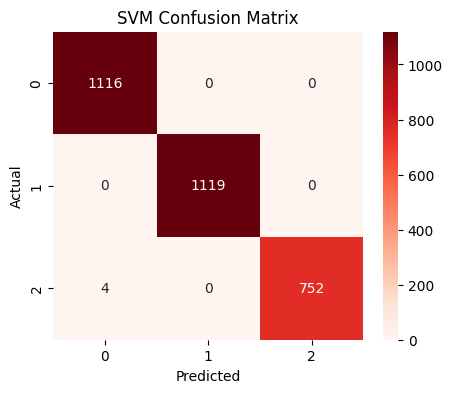

In [54]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Reds')
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

- Model KNN memiliki akurasi: 99.83%, precision: 99.83%, recall: 99.822%, F1-Score: 99.82%. Algoritma ini menunjukkan performa yang sangat tinggi dalam mengenali pola pada dataset.
- SVM sedikit lebih unggul dengan akurasi: 99.86%, precision: 99.88%, recall: 99.823%, F1-Score: 99.85%

Secara umum, SVM memiliki akurasi dan F1-score yang sedikit lebih tinggi dibandingkan KNN, yang menunjukkan bahwa SVM mampu mengklasifikasikan data dengan lebih baik. Hal ini bisa disebabkan oleh kemampuan SVM dalam menangani data berdimensi tinggi serta penggunaan kernel trick untuk menemukan hyperplane optimal. Namun, KNN tetap menjadi pilihan yang baik terutama untuk dataset dengan pola yang lebih sederhana karena lebih mudah diimplementasikan dan tidak memerlukan proses pelatihan yang kompleks.

Setelah melihat nilai dari metriks evaluasi yang sangat besar untuk kedua model, yaitu mencapai 99%, maka proses Hypertuning Parameter tidak terlalu diperlukan dalam kasus ini.



## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [33]:
#Type your code here

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [ ]:
#Type your code here

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

Nilai Precision dan Recall hampir seimbang di kedua model, yang berarti model tidak memiliki bias yang signifikan terhadap kelas tertentu.

Kedua model KNN dan SVM memiliki akurasi yang tinggi, namun kedua model tersebut mungkin tidak akan bekerja sebaik ini untuk data baru dan memiliki resiko mengalami overfitting.

Rekomendasi langkah berikutnya yang bisa dilakukan adalah mengumpulkan data baru untuk mengecek apakah model mengalami overfitting, mencoba algoritma lain seperti Random Forest Classifier untuk mengetes apakah model lebih bagus dan stabil.